In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.width', 1000)

# Data exploration/cleaning

In [2]:
features_df = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
song_rank_df = pd.read_csv('Hot Stuff.csv')

In [4]:
features_df

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,0.0,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,0.0,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,0.0,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,1.0,FUTURE,0.852,...,-7.673,1.0,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,0.0,!!!Going Places!!!,0.531,...,-12.702,1.0,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0


In [5]:
song_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     327895 non-null  object 
 1   WeekID                  327895 non-null  object 
 2   Week Position           327895 non-null  int64  
 3   Song                    327895 non-null  object 
 4   Performer               327895 non-null  object 
 5   SongID                  327895 non-null  object 
 6   Instance                327895 non-null  int64  
 7   Previous Week Position  295941 non-null  float64
 8   Peak Position           327895 non-null  int64  
 9   Weeks on Chart          327895 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 25.0+ MB


In [6]:
features_df['SongID'].sort_values()

17                             "B" GirlsYoung And Restless
18       "Cherry Cherry" from Hot August NightNeil Diamond
19       "Having A Party" MedleyThe Ovations (Featuring...
20                                  "Joy" Pt. IIsaac Hayes
21                              "Roots" MedleyQuincy Jones
                               ...                        
25201                                the.climb.backJ. Cole
28107                       whoa (mind in awe)XXXTENTACION
28112                                        whoknowsMusiq
28622                               www.memoryAlan Jackson
1        ¿Dònde Està Santa Claus? (Where Is Santa Claus...
Name: SongID, Length: 29503, dtype: object

In [7]:
song_rank_df['SongID'].sort_values()

118518                          "B" GirlsYoung And Restless
159230                          "B" GirlsYoung And Restless
28360                           "B" GirlsYoung And Restless
97831                           "B" GirlsYoung And Restless
190113                          "B" GirlsYoung And Restless
                                ...                        
199521                               www.memoryAlan Jackson
4725      ¿Dònde Està Santa Claus? (Where Is Santa Claus...
78121     ¿Dònde Està Santa Claus? (Where Is Santa Claus...
34275     ¿Dònde Està Santa Claus? (Where Is Santa Claus...
136151    ¿Dònde Està Santa Claus? (Where Is Santa Claus...
Name: SongID, Length: 327895, dtype: object

In [8]:
song_rank_df['WeekID'] = pd.to_datetime(song_rank_df['WeekID'])

In [9]:
song_rank_df['Year'] = song_rank_df['WeekID'].dt.year

In [10]:
song_rank_df

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965
1,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965
2,http://www.billboard.com/charts/hot-100/1965-0...,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965
3,http://www.billboard.com/charts/hot-100/1965-0...,1965-08-07,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965
4,http://www.billboard.com/charts/hot-100/1965-0...,1965-08-14,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965
...,...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,2018-10-20,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,2018
327891,http://www.billboard.com/charts/hot-100/1977-0...,1977-05-21,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,1977
327892,http://www.billboard.com/charts/hot-100/1981-0...,1981-05-23,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,1981
327893,http://www.billboard.com/charts/hot-100/1973-0...,1973-09-29,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,1973


In [11]:
music_merge = pd.merge(features_df,song_rank_df[['SongID','WeekID','Year']],on='SongID')

In [12]:
music_merge = music_merge.drop_duplicates(subset='SongID',ignore_index=True)

In [13]:
music_merge

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,WeekID,Year
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-05-05,1962
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958-12-13,1958
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,0.0,The Essential Andy Williams,0.154,...,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0,1965-04-03,1965
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,0.0,Compelling Percussion,0.588,...,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0,1962-09-22,1962
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,0.0,...Baby One More Time (Digital Deluxe Version),0.759,...,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0,1998-11-21,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29378,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-23,2020
29379,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,1.0,FUTURE,0.852,...,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0,2017-03-11,2017
29380,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-16,2006
29381,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,0.0,!!!Going Places!!!,0.531,...,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0,1965-12-25,1965


In [14]:
music_merge = music_merge.drop(columns=['spotify_track_id','spotify_track_preview_url','spotify_track_explicit','spotify_track_album','key'])

In [15]:
music_merge

,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,WeekID,Year
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-05-05,1962
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958-12-13,1958
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",166106.0,0.154,0.185,-14.063,1.0,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0,1965-04-03,1965
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",172066.0,0.588,0.672,-17.278,0.0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0,1962-09-22,1962
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",211066.0,0.759,0.699,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0,1998-11-21,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29378,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-23,2020
29379,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",278429.0,0.852,0.438,-7.673,1.0,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0,2017-03-11,2017
29380,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-16,2006
29381,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",264853.0,0.531,0.642,-12.702,1.0,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0,1965-12-25,1965


# Time duration and popularity of songs

In [16]:
music_merge['spotify_track_duration_ms'] = pd.to_datetime(music_merge['spotify_track_duration_ms'],unit ='ms').dt.strftime('%M:%S')

In [17]:
music_merge['spotify_track_duration_ms'] = music_merge['spotify_track_duration_ms'].replace(to_replace=':',value='.',regex=True).astype('float64')

In [18]:
music_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29383 entries, 0 to 29382
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SongID                     29383 non-null  object        
 1   Performer                  29383 non-null  object        
 2   Song                       29383 non-null  object        
 3   spotify_genre              27788 non-null  object        
 4   spotify_track_duration_ms  24286 non-null  float64       
 5   danceability               24224 non-null  float64       
 6   energy                     24224 non-null  float64       
 7   loudness                   24224 non-null  float64       
 8   mode                       24224 non-null  float64       
 9   speechiness                24224 non-null  float64       
 10  acousticness               24224 non-null  float64       
 11  instrumentalness           24224 non-null  float64       
 12  live

In [19]:
music_time_pop = music_merge[['spotify_track_duration_ms','Year','spotify_track_popularity']]

In [20]:
music_time_pop = music_time_pop.dropna()

In [21]:
music_time_pop

,spotify_track_duration_ms,Year,spotify_track_popularity
2,2.46,1965,38.0
3,2.52,1962,11.0
4,3.31,1998,77.0
5,3.28,2017,73.0
6,3.25,2002,61.0
...,...,...,...
29375,2.55,1967,5.0
29377,4.14,2018,74.0
29379,4.38,2017,51.0
29381,4.24,1965,35.0


In [22]:
music_time_pop['spotify_track_duration_ms'] = music_time_pop['spotify_track_duration_ms'].apply(lambda x : round((((x%1)*100)/60),2)+int(x))

Text(0, 0.5, 'Song Duration')

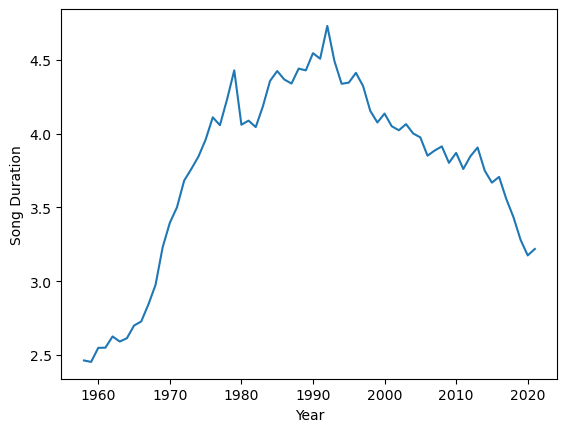

In [23]:
music_time_pop.groupby('Year')['spotify_track_duration_ms'].mean().plot.line().set_ylabel('Song Duration')

# Song Plays for songs that released in different decades

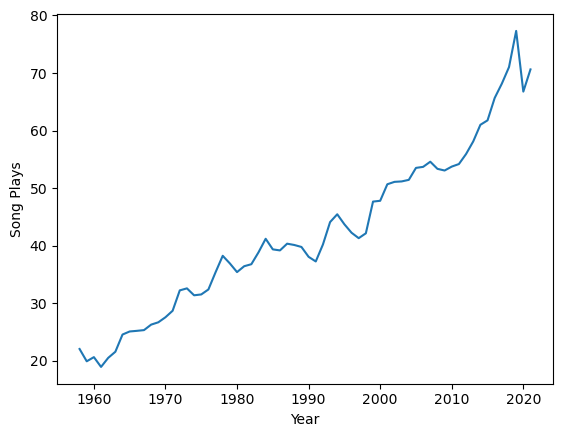

In [24]:
music_time_pop.groupby('Year')['spotify_track_popularity'].mean().plot.line().set_ylabel('Song Plays')
None

Text(0.5, 0, 'Song Plays')

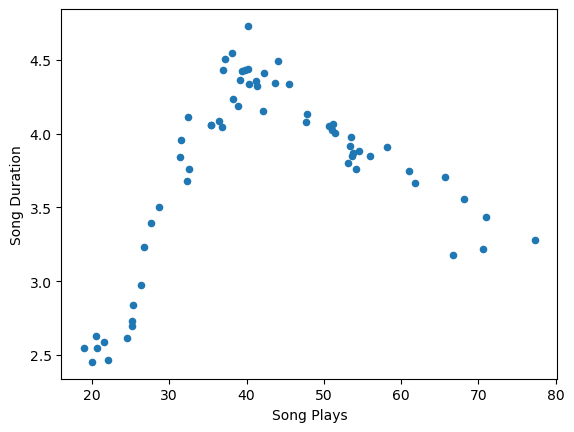

In [26]:
label = music_time_pop.groupby('Year')[['spotify_track_popularity','spotify_track_duration_ms']].mean().plot.scatter(x = 'spotify_track_popularity',y = 'spotify_track_duration_ms')
label.set_ylabel('Song Duration')
label.set_xlabel('Song Plays')

# Music Genres with Popularity

In [27]:
music_merge[['Performer','spotify_genre','spotify_track_popularity']]

,Performer,spotify_genre,spotify_track_popularity
0,Bill Black's Combo,[],NaN
1,Augie Rios,['novelty'],NaN
2,Andy Williams,"['adult standards', 'brill building pop', 'eas...",38.0
3,Sandy Nelson,"['rock-and-roll', 'space age pop', 'surf music']",11.0
4,Britney Spears,"['dance pop', 'pop', 'post-teen pop']",77.0
...,...,...,...
29378,Lil Tjay Featuring Fivio Foreign & Pop Smoke,NaN,NaN
29379,Future,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",51.0
29380,Lil' Boosie Featuring Yung Joc,"['baton rouge rap', 'deep southern trap']",NaN
29381,Herb Alpert & The Tijuana Brass,"['adult standards', 'easy listening', 'lounge']",35.0


In [28]:
music_merge['spotify_genre']=music_merge['spotify_genre'].replace(to_replace='[][]',value = '',regex= True)

In [29]:
music_genre_program = music_merge[['Performer','spotify_genre','spotify_track_popularity']]
music_genre_program

,Performer,spotify_genre,spotify_track_popularity
0,Bill Black's Combo,,NaN
1,Augie Rios,'novelty',NaN
2,Andy Williams,"'adult standards', 'brill building pop', 'easy...",38.0
3,Sandy Nelson,"'rock-and-roll', 'space age pop', 'surf music'",11.0
4,Britney Spears,"'dance pop', 'pop', 'post-teen pop'",77.0
...,...,...,...
29378,Lil Tjay Featuring Fivio Foreign & Pop Smoke,NaN,NaN
29379,Future,"'atl hip hop', 'hip hop', 'pop rap', 'rap', 's...",51.0
29380,Lil' Boosie Featuring Yung Joc,"'baton rouge rap', 'deep southern trap'",NaN
29381,Herb Alpert & The Tijuana Brass,"'adult standards', 'easy listening', 'lounge'",35.0


In [30]:
music_genre_program.dropna(inplace =  True)

C:\Users\VoiDre\AppData\Local\Temp\ipykernel_17572\3937399224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_genre_program.dropna(inplace =  True)


In [31]:
music_genre_program['spotify_genre'] = music_genre_program['spotify_genre'].map(lambda x : x.split(','))

C:\Users\VoiDre\AppData\Local\Temp\ipykernel_17572\3011820795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_genre_program['spotify_genre'] = music_genre_program['spotify_genre'].map(lambda x : x.split(','))


In [32]:
music_genre_program = music_genre_program.explode(column='spotify_genre',ignore_index=True)

In [33]:
music_genre_program.head(20)

,Performer,spotify_genre,spotify_track_popularity
0,Andy Williams,'adult standards',38.0
1,Andy Williams,'brill building pop',38.0
2,Andy Williams,'easy listening',38.0
3,Andy Williams,'mellow gold',38.0
4,Sandy Nelson,'rock-and-roll',11.0
5,Sandy Nelson,'space age pop',11.0
6,Sandy Nelson,'surf music',11.0
7,Britney Spears,'dance pop',77.0
8,Britney Spears,'pop',77.0
9,Britney Spears,'post-teen pop',77.0


In [34]:
music_genre_program['spotify_genre'].replace(to_replace="^\s|[']",value='',regex=True,inplace=True)

In [35]:
music_genre_program['spotify_genre'].nunique()

1043

In [36]:
rock_program = music_genre_program[music_genre_program['spotify_genre']=='rock']

In [37]:
rock_program.groupby('Performer').sum('spotify_track_popularity').sort_values(by = 'spotify_track_popularity',ascending = False).head(10)

,spotify_track_popularity
Performer,
The Beatles,3567.0
The Rolling Stones,2801.0
The Beach Boys,2089.0
Billy Joel,2084.0
U2,1665.0
Aerosmith,1594.0
Chicago,1592.0
Bon Jovi,1488.0
Daryl Hall John Oates,1452.0


In [38]:
mellow_program = music_genre_program[music_genre_program['spotify_genre']=='mellow gold']

In [39]:
mellow_program.groupby('Performer').sum('spotify_track_popularity').sort_values(by = 'spotify_track_popularity',ascending = False).head(10)

,spotify_track_popularity
Performer,
Elton John,2574.0
Billy Joel,2084.0
Bee Gees,1975.0
Rod Stewart,1715.0
Neil Diamond,1638.0
Chicago,1592.0
Daryl Hall John Oates,1452.0
Fleetwood Mac,1397.0
Phil Collins,1385.0


In [40]:
metal_program = music_genre_program[music_genre_program['spotify_genre']=='metal']

In [41]:
metal_program.groupby('Performer').sum('spotify_track_popularity').sort_values(by = 'spotify_track_popularity',ascending = False).head(10)

,spotify_track_popularity
Performer,
Van Halen,1228.0
KISS,1154.0
Alice Cooper,931.0
Metallica,923.0
ZZ Top,745.0
Motley Crue,691.0
Cinderella,408.0
Scorpions,393.0
Rush,348.0


In [42]:
hip_hop_program = music_genre_program[music_genre_program['spotify_genre']=='hip hop']

In [43]:
hip_hop_program.groupby('Performer').sum('spotify_track_popularity').sort_values(by = 'spotify_track_popularity',ascending = False).head(10)

,spotify_track_popularity
Performer,
Drake,6042.0
Eminem,2804.0
Lil Wayne,1844.0
J. Cole,1795.0
Future,1749.0
Mac Miller,1341.0
Kendrick Lamar,1208.0
JAY-Z,1194.0
Mary J. Blige,953.0


In [44]:
music_merge_genres=music_merge[["spotify_genre","Year"]].copy()

In [45]:
music_merge_genres.dropna(inplace=True)

In [46]:
music_merge_genres["spotify_genre"].replace("[\[\]]","",regex=True,inplace=True)

In [47]:
music_merge_genres["spotify_genre"].replace("'","",regex=True,inplace=True)

In [48]:
music_merge_genres["spotify_genre"]=list(map(lambda x:x.split(','),music_merge_genres["spotify_genre"]))

In [49]:
music_merge_genres=music_merge_genres.explode("spotify_genre")

In [50]:
music_merge_genres

,spotify_genre,Year
0,,1962
1,novelty,1958
2,adult standards,1965
2,brill building pop,1965
2,easy listening,1965
...,...,...
29380,deep southern trap,2006
29381,adult standards,1965
29381,easy listening,1965
29381,lounge,1965


In [51]:
# 60s
genres_60s=music_merge_genres[(music_merge_genres["Year"]<1970)&(music_merge_genres["Year"]>=1960)]

Text(0.5, 1.0, '60s')

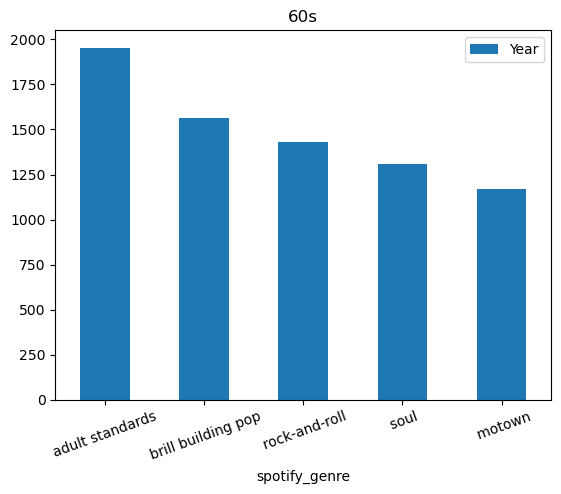

In [52]:
genres_60s.groupby("spotify_genre").count().sort_values("Year",ascending=False).head(5).plot.bar(rot=20).set_title("60s")

In [53]:
# 70s
genres_70s=music_merge_genres[(music_merge_genres["Year"]<1980)&(music_merge_genres["Year"]>=1970)]

Text(0.5, 1.0, '70s')

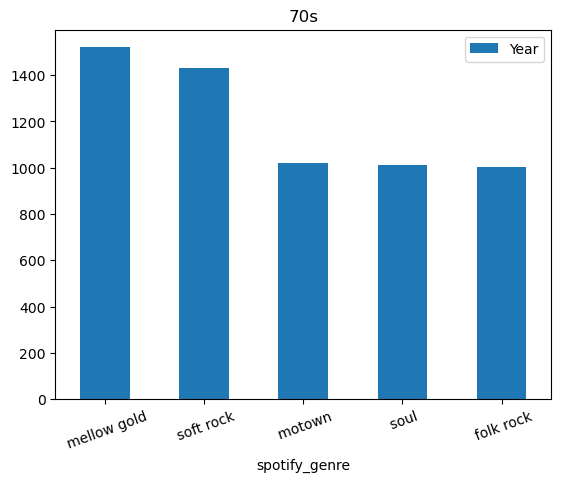

In [54]:
genres_70s.groupby("spotify_genre").count().sort_values("Year",ascending=False).head(5).plot.bar(rot=20).set_title("70s")

In [55]:
# 80s
genres_80s=music_merge_genres[(music_merge_genres["Year"]<1990)&(music_merge_genres["Year"]>=1980)]

Text(0.5, 1.0, '80s')

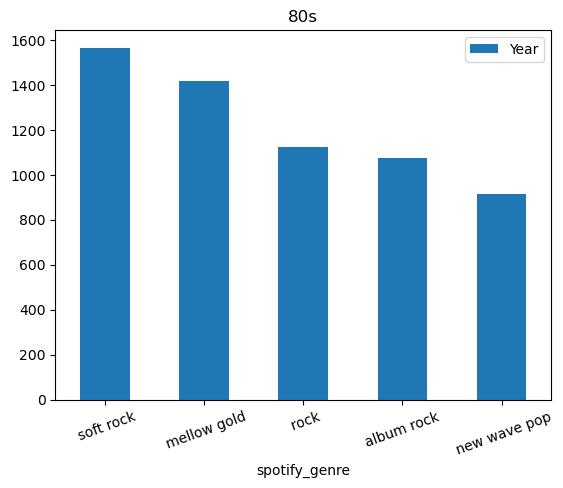

In [56]:
genres_80s.groupby("spotify_genre").count().sort_values("Year",ascending=False).head(5).plot.bar(rot=20).set_title("80s")

C:\Users\VoiDre\AppData\Local\Temp\ipykernel_17572\1823192503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_90s.drop(index=genres_90s[genres_90s["spotify_genre"]==""].index,axis=0,inplace=True)


Text(0.5, 1.0, '90s')

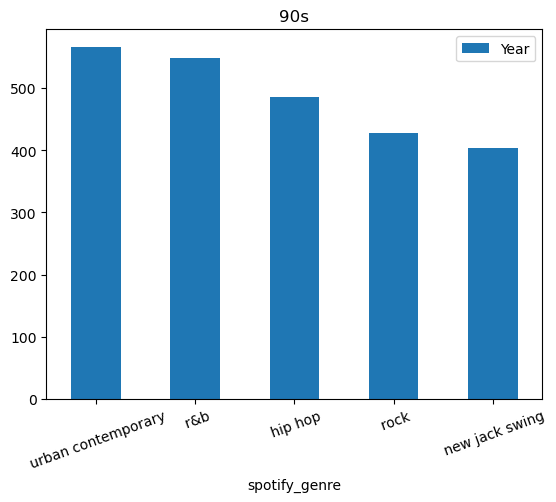

In [57]:
#90s
genres_90s=music_merge_genres[(music_merge_genres["Year"]<2000)&(music_merge_genres["Year"]>=1990)]
genres_90s.drop(index=genres_90s[genres_90s["spotify_genre"]==""].index,axis=0,inplace=True)
genres_90s.groupby("spotify_genre").count().sort_values("Year",ascending=False).head(5).plot.bar(rot=20).set_title("90s")

Text(0.5, 1.0, '00s')

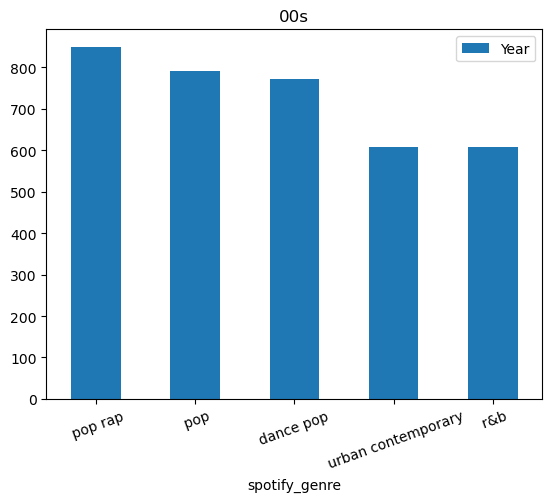

In [58]:
#00s
genres_00s=music_merge_genres[(music_merge_genres["Year"]<2010)&(music_merge_genres["Year"]>=2000)]
genres_00s.groupby("spotify_genre").count().sort_values("Year",ascending=False).head(5).plot.bar(rot=20).set_title("00s")

Text(0.5, 1.0, '2010s')

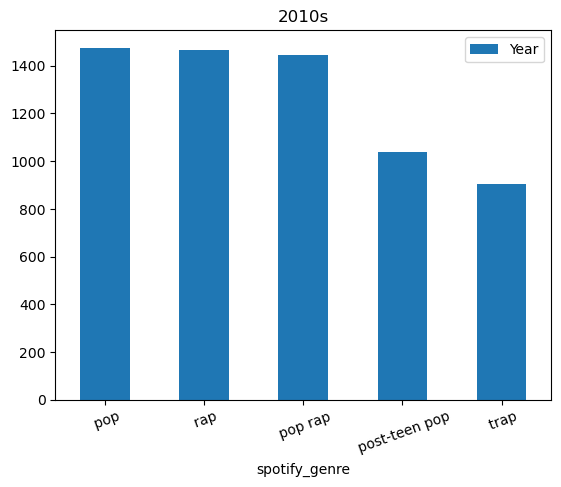

In [59]:
#10s
genres_20s=music_merge_genres[(music_merge_genres["Year"]>=2010)&(music_merge_genres["Year"]<=2020)]
genres_20s.groupby("spotify_genre").count().sort_values("Year",ascending=False).head(5).plot.bar(rot=20).set_title("2010s")

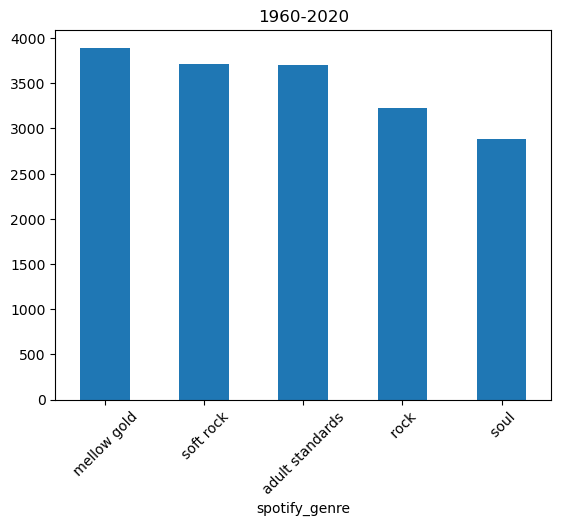

In [60]:
#overall
x=music_merge_genres.groupby("spotify_genre").count().sort_values("Year",ascending=False).head().plot.bar(rot=45)
x.set_title("1960-2020")
x.get_legend().remove()

In [61]:
music_merge.head(2)

,SongID,Performer,Song,spotify_genre,spotify_track_duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,WeekID,Year
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-05-05,1962
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),'novelty',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958-12-13,1958


In [62]:
# Top performers per decade 

## 60s

top_60s_perf=music_merge[["Performer","Year","spotify_track_popularity"]].copy()
top_60s_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29383 entries, 0 to 29382
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Performer                 29383 non-null  object 
 1   Year                      29383 non-null  int64  
 2   spotify_track_popularity  24286 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 688.8+ KB


In [63]:
top_60s_perf.dropna(inplace=True)
top_60s_perf=top_60s_perf[(top_60s_perf["Year"]>=1960)&(top_60s_perf["Year"]<=1969)]

In [64]:
sum_popular= top_60s_perf["spotify_track_popularity"].sum()
top_60s_perf["percentage"]=top_60s_perf["spotify_track_popularity"].map(lambda x: (x/sum_popular)*100)
top_60s_perf

,Performer,Year,spotify_track_popularity,percentage
2,Andy Williams,1965,38.0,0.030672
3,Sandy Nelson,1962,11.0,0.008879
15,The Angels,1961,10.0,0.008072
27,Mel Carter,1965,17.0,0.013722
31,The Olympics,1960,5.0,0.004036
...,...,...,...,...
29346,Brenda Lee,1963,12.0,0.009686
29364,Ohio Express,1968,39.0,0.031480
29366,"Dave Dee, Dozy, Beaky, Mick And Tich",1968,32.0,0.025829
29375,The Five Americans,1967,5.0,0.004036


In [65]:
top_60s_perf.groupby("Performer").sum("percentage").sort_values("percentage",ascending=False).head()

,Year,spotify_track_popularity,percentage
Performer,,,
The Beatles,108086,3261.0,2.632174
The Beach Boys,68773,1671.0,1.348777
Sam Cooke,56920,1254.0,1.012188
The Rolling Stones,45217,1181.0,0.953265
Aretha Franklin,57034,1113.0,0.898378


In [66]:
## 70s

top_70s_perf=music_merge[["Performer","Year","spotify_track_popularity"]].copy()
top_70s_perf.dropna(inplace=True)
top_70s_perf=top_70s_perf[(top_70s_perf["Year"]>=1970)&(top_70s_perf["Year"]<=1979)]

In [67]:
sum_popular_70= top_70s_perf["spotify_track_popularity"].sum()
top_70s_perf["percentage"]=top_70s_perf["spotify_track_popularity"].map(lambda x: (x/sum_popular_70)*100)

In [68]:
top_70s_perf.groupby("Performer").sum("percentage").sort_values("percentage",ascending=False).head()

,Year,spotify_track_popularity,percentage
Performer,,,
Elton John,43424,1203.0,0.878089
Bee Gees,43444,1170.0,0.854002
Carpenters,43423,1090.0,0.795609
Stevie Wonder,39466,1082.0,0.789769
Eagles,33577,1076.0,0.785390


In [69]:
## 80s

top_80s_perf=music_merge[["Performer","Year","spotify_track_popularity"]].copy()
top_80s_perf.dropna(inplace=True)
top_80s_perf=top_80s_perf[(top_80s_perf["Year"]>=1980)&(top_80s_perf["Year"]<=1989)]

In [70]:
sum_popular_80= top_80s_perf["spotify_track_popularity"].sum()
top_80s_perf["percentage"]=top_80s_perf["spotify_track_popularity"].map(lambda x: (x/sum_popular_80)*100)

In [71]:
top_80s_perf.groupby("Performer").sum("percentage").sort_values("percentage",ascending=False).head()

,Year,spotify_track_popularity,percentage
Performer,,,
Madonna,37736,1094.0,0.803968
Billy Joel,39663,1078.0,0.792210
Journey,35695,952.0,0.699614
Michael Jackson,29767,949.0,0.697410
Daryl Hall John Oates,39665,944.0,0.693735


In [72]:
## 90s

top_90s_perf=music_merge[["Performer","Year","spotify_track_popularity"]].copy()
top_90s_perf.dropna(inplace=True)
top_90s_perf=top_90s_perf[(top_90s_perf["Year"]>=1990)&(top_90s_perf["Year"]<=1999)]

In [73]:
sum_popular_90= top_90s_perf["spotify_track_popularity"].sum()
top_90s_perf["percentage"]=top_90s_perf["spotify_track_popularity"].map(lambda x: (x/sum_popular_90)*100)

In [74]:
top_90s_perf.groupby("Performer").sum("percentage").sort_values("percentage",ascending=False).head()

,Year,spotify_track_popularity,percentage
Performer,,,
Madonna,45863,1044.0,0.884394
Mariah Carey,31893,947.0,0.802223
Celine Dion,27919,765.0,0.648047
Michael Jackson,21930,692.0,0.586207
R.E.M.,23934,687.0,0.581972


In [75]:
## 00s

top_00s_perf=music_merge[["Performer","Year","spotify_track_popularity"]].copy()
top_00s_perf.dropna(inplace=True)
top_00s_perf=top_00s_perf[(top_00s_perf["Year"]>=2000)&(top_00s_perf["Year"]<=2009)]

In [76]:
sum_popular_00= top_00s_perf["spotify_track_popularity"].sum()
top_00s_perf["percentage"]=top_00s_perf["spotify_track_popularity"].map(lambda x: (x/sum_popular_00)*100)

In [77]:
top_00s_perf.groupby("Performer").sum("percentage").sort_values("percentage",ascending=False).head()

,Year,spotify_track_popularity,percentage
Performer,,,
Rascal Flatts,54148,1328.0,0.809608
Toby Keith,56131,1266.0,0.771810
Glee Cast,46207,1182.0,0.720600
Taylor Swift,42170,1173.0,0.715113
Britney Spears,36093,1129.0,0.688289


In [78]:
## 10s

top_10s_perf=music_merge[["Performer","Year","spotify_track_popularity"]].copy()
top_10s_perf.dropna(inplace=True)
top_10s_perf=top_10s_perf[(top_10s_perf["Year"]>=2010)&(top_10s_perf["Year"]<=2019)]

In [79]:
sum_popular_10= top_10s_perf["spotify_track_popularity"].sum()
top_10s_perf["percentage"]=top_10s_perf["spotify_track_popularity"].map(lambda x: (x/sum_popular_10)*100)

In [80]:
top_10s_perf.groupby("Performer").sum("percentage").sort_values("percentage",ascending=False).head()

,Year,spotify_track_popularity,percentage
Performer,,,
Glee Cast,317700,7179.0,2.700304
Drake,163302,5378.0,2.022877
Taylor Swift,122860,3879.0,1.459044
The Weeknd,60479,2208.0,0.830515
Post Malone,50452,1976.0,0.743251
